<a href="https://colab.research.google.com/github/iaagulo/Machine-Learning-Basics/blob/main/Ch02_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.0 Gradient Descent<br>
First, let's upload the modules that we need.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
import seaborn as sb

Consider this relation between two variables, $x$ and $y$.

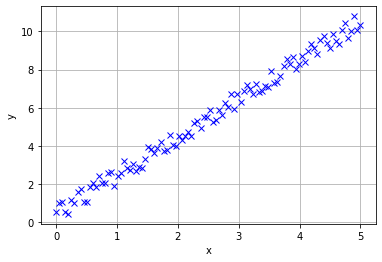

In [ ]:
m = 2
b = 0.5

x = np.linspace(0,5,100)
y = addrandomfluctuations(x,m,b,1)
plt.plot(x,y,'bx')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

*Figure 2.1. A data set that forms a straight line.*

##2.1 The Cost Function<br>
The cost function describes is a measure of the error between the expected value and the measured value. The higher the error, the more it "costs" to correct the error. Thus, the goal is to minimize the error, and therefore, the cost function. <br>
Consider the linear given data set plotted against the best fit line. For this example, the cost function, $J(\theta_0,\theta_1)$, is given by the expression<br>
$J(\theta_0,\theta_1)=\frac{1}{2n}\sum_{i=1}^{n} [(\theta_0 + \theta_1 x_i)-y_i]^2$<br>
where $(\theta_0 + \theta_1 x_i)$ is the equation of the best fit line described by its slope, $\theta_1$, and y-intercept, $\theta_0$, and  is the measured value at the $i^{th}$ data point. Thus, the term in the square brackets $(\theta_0 + \theta_1 x_i)-y_i$ corresponds to the difference between the best fit line and the measured values. When the cost function is minimized, we have the optimum value for the slope, $\theta_1$, and y-intercept, $\theta_0$, and the term  is small as it could be for each data point. In Figure 2.2, the term  is the value between each of the blue crosses and the value of the best fit line corresponding to $x_i$.

(0.0, 0.5, 0.0, 2.0)

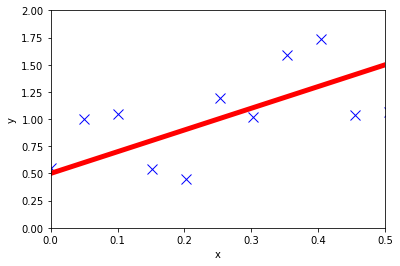

In [ ]:
plt.plot(x,y,'bx', markersize=10,linewidth=2)
ylr = addrandomfluctuations(x,m,b,0)
plt.plot(x,ylr,'r', linewidth=5)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 0.5, 0, 2])

*Figure 2.2. The difference between the blue crosses and the red line at each data point, $x_i$, corresponds to the term $(\theta_0 + \theta_1 x_i)-y_i$.*

Let's also display the first few data points by assigning the datasets to a table.

In [ ]:
from tabulate import tabulate

T = [[x,y]]
print(tabulate(T,headers=['X Data','Y Data']))

X Data                                                              Y Data
------------------------------------------------------------------  ------------------------------------------------------------------------
[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525  [ 0.76275206  1.08823203  0.74415647  0.79410391  0.9423267   1.08120705
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556    1.26845058  1.27158961  1.43182567  0.99085047  1.89955928  1.48988539
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586    2.11959068  2.05652834  1.66970936  2.15372978  1.6892935   2.55824384
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616    1.91577557  2.10696587  2.53310981  2.29199083  2.79484508  3.0502433
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646    2.43904069  2.75195737  3.44621507  3.55113095  2.94450564  3.88176593
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677    3.64006054

Let's try to understand what is happening here and what it means to our data when we minimize one of these parameters. Let's set the y-intercept to $\theta_0=0.5$ and then vary the slope of the line, $\theta_1$. While we vary the slope, we take a look at the cost function.<br>
Watch this video and try to figure out what the value of $\theta_1$ is that minimizes the cost function. The function *costfunction()* is defined at the end of this script and solves for the costfunction. To plot the result, we defined the plot_costfunction_2D() located at the end of this script. Here the y-intercept is fixed and the slope is varied. So, the red line is fixed at one end and just sweeps over an area on the graph eventually passing through all the data points neatly, which corresponds to when the cost function has a minimum value.

In [ ]:
theta0 = np.array([0.5])
theta1 = np.arange(0,4,0.1)
time = 0.2

J = costfunction(x,y,theta0,theta1)
plot_costfunction_2D(x,y,theta0,theta1,J,time)

# fig,ax = plt.subplots(1,2,figsize=(8,8))
# ph0, = ax[0].plot(x,ylr,'r')
# ph1, = ax[1].plot(theta1,J[0,:],'bx')

# def animate(i):
#   ylr = addrandomfluctuations(x,theta1[:i],theta0,0)
#   ph0.set_data(x, ylr)
#   ph1.set_data(theta1[:i],J[0,:i])
#   return [ph0,ph1]

# ani = animation.FuncAnimation(fig, animate, interval=1000)
# plt.show()

# ani.save('CostFunction.mp4', writer = 'ffmpeg', fps = 30)

*Video 2.1. As the value of $\theta_1$ varies from 0 to 4, we see the red line slowly becoming closer to the blue data points until it fits nicely. This corresponds to the minimum value of the cost function.*

We can observe the same thing if we set the slope $\theta_1=2$ and vary the y-intercept, $\theta_0$.<br>
Watch this video and try to figure out what the value of $\theta_1$ is that minimizes the cost function. Here the slope is fixed and the y-intercept is varied. So, the red line slowly rises from a low y-intercept value to a high y-intercept value. At some value $\theta_0$, the red line passes through all the points neatly, which corresponds to when the cost function has a minimum value.

In [ ]:
theta0 = np.arange(-2,2,0.1)
theta1 = np.array([2])
time = 0.1

J = costfunction(x,y,theta0,theta1)
plot_costfunction_2D(x,y,theta0,theta1,J,time)

*Video 2.2. As the value of $\theta_0$ varies from -2 to 2, we see the red line slowly becoming closer to the blue data points until it fits nicely. This corresponds to the minimum value of the cost function.*

Now, let's take a look at the full 3D image of the cost function. In other words, we plot the cost function, $J(\theta_0,\theta_1)$ against both $\theta_0$ and $\theta_1$, and then compare it with how the red line fits the data set.<br>
First, let's take a look at where the minimum value of the cost function is. The black dot on the cost function graph depicts this minimum value.

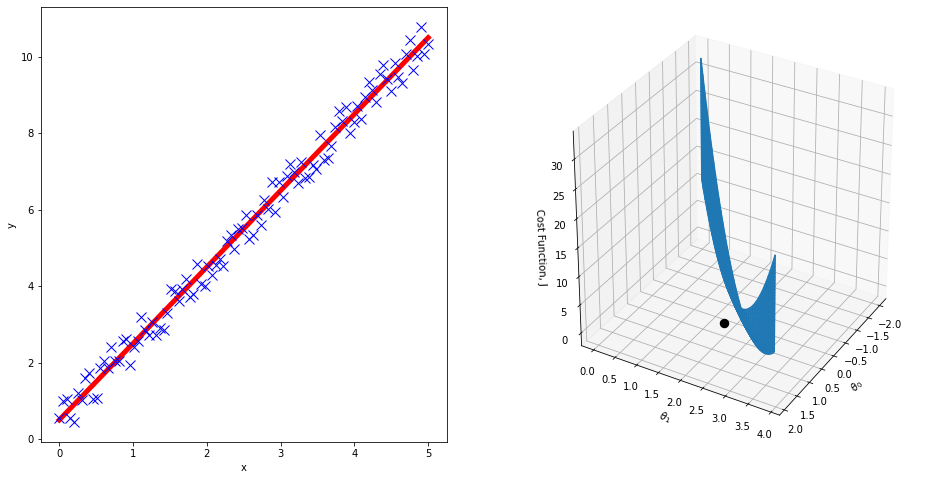

In [ ]:
theta0 = np.arange(-2,2,0.1)
theta1 = np.arange(0,4,0.1)
init0 = np.array([0.5])
init1 = np.array([2])
time = 0.1

J = costfunction(x,y,theta0,theta1)
plot_costfunction_3D(x,y,theta0,theta1,J,init0,init1,time)

*Video 2.3. The location of the minimum value and the best fit line for the given data set.*

Now, we fix the y-intercept, $\theta_0$, and allow the slope, $\theta_1$ to vary. The black dot on the 3D plot of the cost function corresponds to the various values of the y-intercept and the slope.

In [ ]:
init0 = np.arange(-2,2,0.1)
init1 = np.array([2])
time = 0.1

J = costfunction(x,y,theta0,theta1)
plot_costfunction_3D(x,y,theta0,theta1,J,init0,init1,time)

*Video 2.4. The various values of the slope, $\theta_1$, with a fixed y-intercept, $\theta_0$ in relation to the fitting line.*

We now vary the y-intercept, $\theta_0$, and fix the slope, $\theta_1$ to a specific value. The black dot on the 3D plot of the cost function corresponds to the various values of the y-intercept and the slope.

In [ ]:
init0 = np.array([0.5])
init1 = np.arange(0,4,0.1)
time = 0.1

J = costfunction(x,y,theta0,theta1)
plot_costfunction_3D(x,y,theta0,theta1,J,init0,init1,time)

*Video 2.5. The various values of the y-intercept, $\theta_0$, with a fixed slope, $\theta_1$, in relation to the fitting line.*

#2.2 The Derivative of the Cost Function
How do we determine the minimum value of the cost function? We use gradient descent to determine the fastest way to the minimum value from a given set of initial parameters or initial guesses. To perform gradient descent, we need to take the derivative of the cost function with respect to the parameters, $\theta_0$ and $\theta_1$. We get the following expressions:<br>
$\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_0} = \frac{1}{n} \sum_{i=1}^{n} [(\theta_0 + \theta_1 x_i)-y_i]$ and $\frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1} = \frac{1}{n} \sum_{i=1}^{n} [(\theta_0 + \theta_1 x_i)-y_i]x_i$.<br>
These derivatives point towards the greatest change in the cost function along the direction of the parameters. Thus, in one iteration, we get a new guess for the optimum value by subtracting these values from the initial guesses. In other words,<br>
$\theta_0 - \alpha \frac{\partial J(\theta_0,\theta_1)}{\partial \theta_0} \rightarrow \theta_0$ and $\theta_1 - \alpha \frac{\partial J(\theta_0,\theta_1)}{\partial \theta_1} \rightarrow \theta_1$.<br>
Using those new values, we get a new set of gradients, which we then subtract again from these new guesses to get a third guess. We do this iteratively until the gradient becomes very small or until after a specified number of iterations. The implementation of the gradient descent can be seen in the *gradient_descent()* function at the end of the script.

In [ ]:
iter = 51
learning_rate = 0.15
time = 0.1

init0 = -2  # possible values -2,2,0.1
init1 = 0   # possible values 0,4,0.1

Jcost = gradient_descent(x,y,init0,init1,iter,learning_rate,time)

*Video 2.5. Using gradient descent to determine the optimum value of the cost function.*

We can plot the cost function and see how it decreases per iteration.

Text(0, 0.5, 'Cost Function, J')

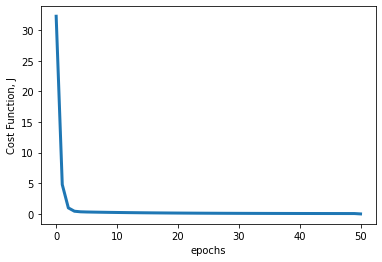

In [ ]:
plt.plot(Jcost,linewidth=3)
plt.xlabel('epochs')
plt.ylabel('Cost Function, J')

*Figure 2.3. The decrease of the cost function is seen with the number of iterations or epochs.*

#2.3The Learning Rate
The basic algorithm for the gradient descent can be written as<br>
$iterate \{ \theta_i - \alpha \frac{\partial J(\theta_0,\theta_1)}{\partial \theta_i} \rightarrow \theta_i \}_{i=0,1}$.<br>
You might notice that there is a parameter, . This parameter is called a learning rate. It's a parameter that when properly chosen, you converge to the optimum value quickly. Otherwise, the convergence will be too slow or it might not converge at all. Using the same code we used in section 2.2, try to change the learning rate to a smaller value and then to a larger value to see what happens.<br>
In choosing the learning rate, you want a relatively smooth decrease of the cost function with the number of iterations.

#Functions to be used for this chapter

Let's define all the functions that we are going to use.

In [ ]:
## function that adds random values to the vertical axis
## so that the data set looks random
def addrandomfluctuations(x,m,b,fluctuationsize):
  import random

  yrand = np.zeros(len(x))
  for i in range(len(x)):
    yrand[i] = m*x[i] + b + fluctuationsize*(random.random()-0.5)
  
  return yrand

In [ ]:
## function that computes the cost function
def costfunction(x,y,th0,th1):
  n = len(y)

  J = np.zeros([len(th0),len(th1)])
  for i in range(len(th0)):
    for j in range(len(th1)):
      J[i,j] = (1/(2*n))*np.sum(np.power((th0[i] + th1[j]*x - y),2))

  return J

In [ ]:
def plot_costfunction_2D(x,y,th0,th1,J,time):

  for i in range(len(th0)):
    for j in range(len(th1)):
      fig, ax = plt.subplots(1,2,figsize=(16,8))
      plt.axis([0,5,0,12])
      ylr = addrandomfluctuations(x,th1[j],th0[i],0)
      ax[0].plot(x,ylr,'r', linewidth=5)
      ax[0].plot(x,y,'bx', markersize=10,linewidth=2)
      plt.xlabel('x')
      plt.ylabel('y')

      if th1.shape[0] == 1:
        ax[1].plot(th0[:i],J[:i,j],'bx', markersize=10,linewidth=2)
        plt.xlabel(r'$\theta_0$')
        plt.ylabel('Cost Function, J')
        plt.axis([-2,2,0,4])
      else:
        ax[1].plot(th1[:j],J[i,:j],'bx', markersize=10,linewidth=2)
        plt.xlabel(r'$\theta_1$')
        plt.ylabel('Cost Function, J')
        plt.axis([0,4,0,20])

      plt.show()
      plt.pause(time)

In [ ]:
def plot_costfunction_3D(x,y,theta0,theta1,J,th0,th1,time):

  for i in range(len(th0)):
    for j in range(len(th1)):
      fig = plt.figure(figsize=(16,8))
      plt.axis([0,5,0,12])
      ax = fig.add_subplot(1,2,1)
      ylr = addrandomfluctuations(x,th1[j],th0[i],0)
      ax.plot(x,ylr,'r', linewidth=5)
      ax.plot(x,y,'bx', markersize=10,linewidth=2)
      plt.xlabel('x')
      plt.ylabel('y')

      ax = fig.add_subplot(1,2,2,projection = '3d')
      surf = ax.plot_wireframe(theta0,theta1,(J),cmap=cm.Spectral,antialiased=True)
      Jcost = (1/(2*len(y)))*np.sum(np.power((th0[i] + th1[j]*x - y),2))
      scatter2 = ax.scatter(th0[i],th1[j],Jcost,c='k',marker='o',linewidth=5)
      ax.view_init(30, 30)
      ax.set_xlabel(r'$\theta_0$')
      ax.set_ylabel(r'$\theta_1$')
      ax.set_zlabel(r'Cost Function, J')

      plt.pause(time)
  plt.show()

In [ ]:
def gradient_descent(x,y,init0,init1,iter,a,time):
  t0 = np.zeros([iter])
  t1 = np.zeros([iter])
  gradJcost0 = np.zeros([iter])
  gradJcost1 = np.zeros([iter])
  Jcost = np.zeros([iter])
  t0[0] = init0
  t1[0] = init1

  n = len(y)
  theta0 = np.arange(-2,2,0.1)
  theta1 = np.arange(0,4,0.1)
  J = costfunction(x,y,theta0,theta1)

  for i in range(iter-1):
    print(t0[i])

    fig = plt.figure(figsize=(16,8))
    # plt.axis([0,5,0,12])
    ax = fig.add_subplot(1,2,1)
    ylr = addrandomfluctuations(x,t1[i],t0[i],0)
    ax.plot(x,ylr,'r', linewidth=5)
    ax.plot(x,y,'bx', markersize=10,linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y')

    ax = fig.add_subplot(1,2,2,projection = '3d')
    surf = ax.plot_wireframe(theta0,theta1,(J),cmap=cm.Spectral,antialiased=True)
    Jcost[i] = (1/(2*len(y)))*np.sum(np.power((t0[i] + t1[i]*x - y),2))
    scatter2 = ax.scatter(t0[i],t1[i],Jcost,c='k',marker='o',linewidth=5)
    ax.view_init(50, 10)
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel(r'Cost Function, J')

    plt.pause(time)

    # Solve for the derivative
    gradJcost0[i] = (1/n)*sum(t0[i] + t1[i]*x - y)
    gradJcost1[i] = (1/n)*sum( (t0[i] + t1[i]*x - y)*x )

    # Get new values of the parameters
    t0[i+1] = t0[i] - a*gradJcost0[i]
    t1[i+1] = t1[i] - a*gradJcost1[i]

  plt.show()
  return Jcost